In [38]:
import pandas as pd
import uproot
import os
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [39]:
os.system("/opt/exp_soft/cms/t3/eos-login -username tcuisset")
#Data 100 GeV
input_file = '/eos/cms/store/group/dpg_hgcal/tb_hgcal/2018/cern_h2_october/offline_analysis/ntuples/v16/ntuple_484.root'

# Simulation 100 GeV v3 (sim_proton)
#input_file = '/eos/cms/store/group/dpg_hgcal/tb_hgcal/2018/cern_h2_october/offline_analysis/sim_ntuples/CMSSW11_0_withAHCAL_newBeamline/FTFP_BERT_EMN/v3/electrons/ntuple_sim_config22_pdgID11_beamMomentum100_listFTFP_BERT_EMN_0000_1.root'

# Simulation 100 GeV v5 (sim_noproton)
#input_file = '/eos/cms/store/group/dpg_hgcal/tb_hgcal/2018/cern_h2_october/offline_analysis/sim_ntuples/CMSSW11_0_withAHCAL_newBeamline/FTFP_BERT_EMN/v5/electrons/ntuple_sim_config22_pdgID11_beamMomentum100_listFTFP_BERT_EMN_0000_1.root'

# Simulation 100 GeV v7 (with proton)
#input_file = '/eos/cms/store/group/dpg_hgcal/tb_hgcal/2018/cern_h2_october/offline_analysis/sim_ntuples/CMSSW11_0_withAHCAL_newBeamline/FTFP_BERT_EMN/v7_33m/electrons/ntuple_sim_config22_pdgID11_beamMomentum100_listFTFP_BERT_EMN_0000_1.root'

for array_i in uproot.iterate(input_file + ":trackimpactntupler/impactPoints", step_size="10MB", library="ak"):
    array_impact = array_i
    break

In [40]:
for array_i in uproot.iterate(input_file + ":rechitntupler/hits", step_size="10MB", library="ak",
    filter_name=["event", 'rechit_detid',
       'rechit_module', 'rechit_layer', 'rechit_chip', 'rechit_channel',
       'rechit_x', 'rechit_y', 'rechit_z', 'rechit_energy']):
    array_hits = array_i
    break

In [41]:
shift_map = {
1 : (-3.52216, 2.72417),
2 : (-3.62642, 2.71253),
3 : (-3.70279, 2.73514),
4 : (-3.68178, 2.69013),
5 : (-3.53902, 2.73582),
6 : (-3.60895, 2.7601),
7 : (-3.77711, 2.70275),
8 : (-3.78309, 2.70013),
9 : (-3.74654, 2.62871),
10 : (-3.79885, 2.64894),
11 : (-3.83036, 2.61498),
12 : (-3.85046, 2.61856),
13 : (-3.80845, 2.6431),
14 : (-3.88973, 2.57074),
15 : (-3.83787, 2.64904),
16 : (-3.93072, 2.62127),
17 : (-3.84896, 2.591),
18 : (-3.93918, 2.60614),
19 : (-3.918, 2.53426),
20 : (-3.96107, 2.5747),
21 : (-3.99221, 2.60619),
22 : (-4.03038, 2.62723),
23 : (-3.97634, 2.5293),
24 : (-3.98103, 2.59362),
25 : (-3.99045, 2.58746),
26 : (-4.02747, 2.57666),
27 : (-4.00032, 2.48522),
28 : (-3.95834, 2.49272),
}
layer_to_z = {1: 13.8774995803833,
  2: 14.767499923706055,
  3: 16.782499313354492,
  4: 17.672500610351562,
  5: 19.6875,
  6: 20.577499389648438,
  7: 22.6924991607666,
  8: 23.582500457763672,
  9: 25.697500228881836,
  10: 26.587499618530273,
  11: 28.702499389648438,
  12: 29.592500686645508,
  13: 31.50749969482422,
  14: 32.397499084472656,
  15: 34.3125,
  16: 35.20249938964844,
  17: 37.11750030517578,
  18: 38.00749969482422,
  19: 39.92250061035156,
  20: 40.8125,
  21: 42.907501220703125,
  22: 44.037498474121094,
  23: 46.412498474121094,
  24: 47.54249954223633,
  25: 49.68199920654297,
  26: 50.6879997253418,
  27: 52.881500244140625,
  28: 53.903499603271484}

In [42]:
df_hits = ak.to_dataframe(array_hits, levelname=lambda i : {0 : "event_minus_one", 1:"rechit_id"}[i]).reset_index(level=1).reset_index(level=0, drop=True).set_index("event")
df_impact = ak.to_dataframe(array_impact, levelname=lambda i: {0 : "event_minus_one"}[i]).reset_index(drop=True).set_index("event")

In [43]:
def plotEvent(event_df, mapX=lambda x, layer : x, mapY=lambda y, layer:y):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.view_init(vertical_axis="y")
    x = []
    y = []
    z = []
    for layer in range(1, 29):
        x.append(mapX(event_df["impactX_HGCal_layer_"+str(layer)], layer))
        y.append(mapY(event_df["impactY_HGCal_layer_"+str(layer)], layer))
        z.append(layer_to_z[layer])
    ax.plot(x, y, z)
    ax.set_xlabel("impactX (cm)")
    ax.set_ylabel("impactY (cm)")
    ax.set_zlabel("layer z position (cm)")

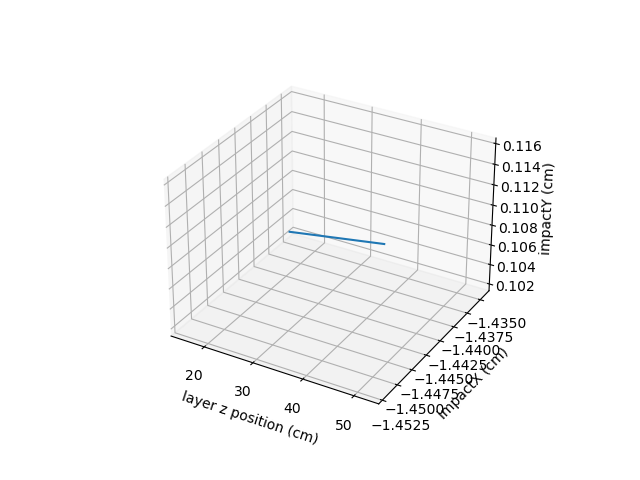

In [44]:
plotEvent(df_impact.loc[2])

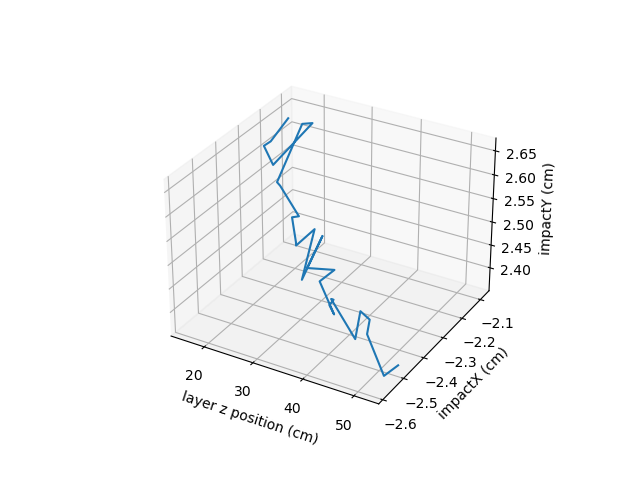

In [45]:
plotEvent(df_impact.loc[2], lambda x, layer: -x + shift_map[layer][0], lambda y, layer : -y + shift_map[layer][1])

<Axes: >

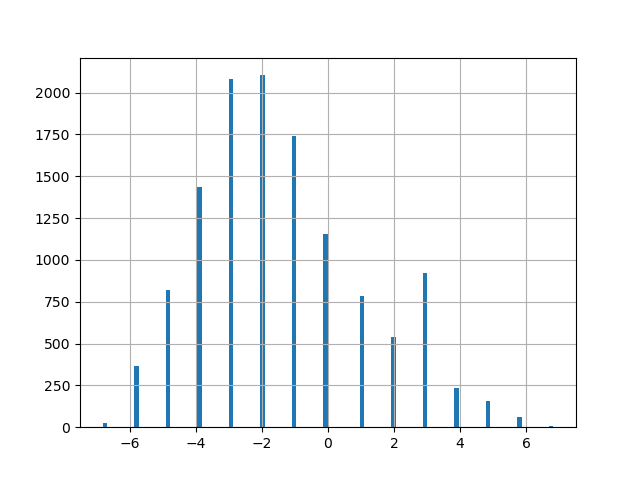

In [46]:
plt.figure()
df_hits[df_hits.rechit_layer == 25]["rechit_x"].hist(bins=100)